In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


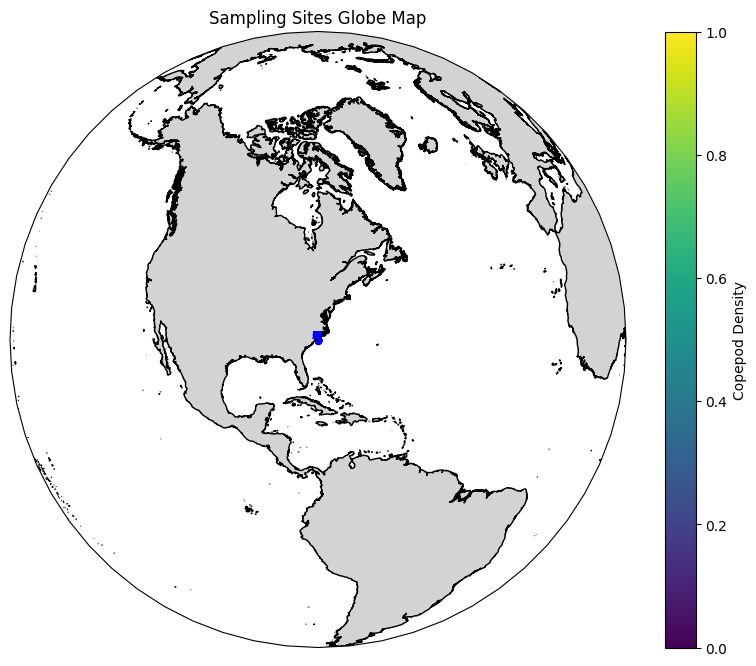

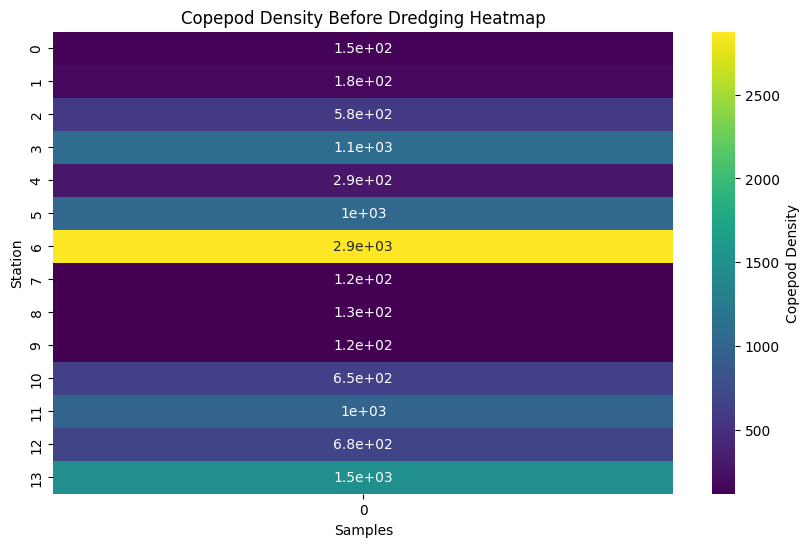

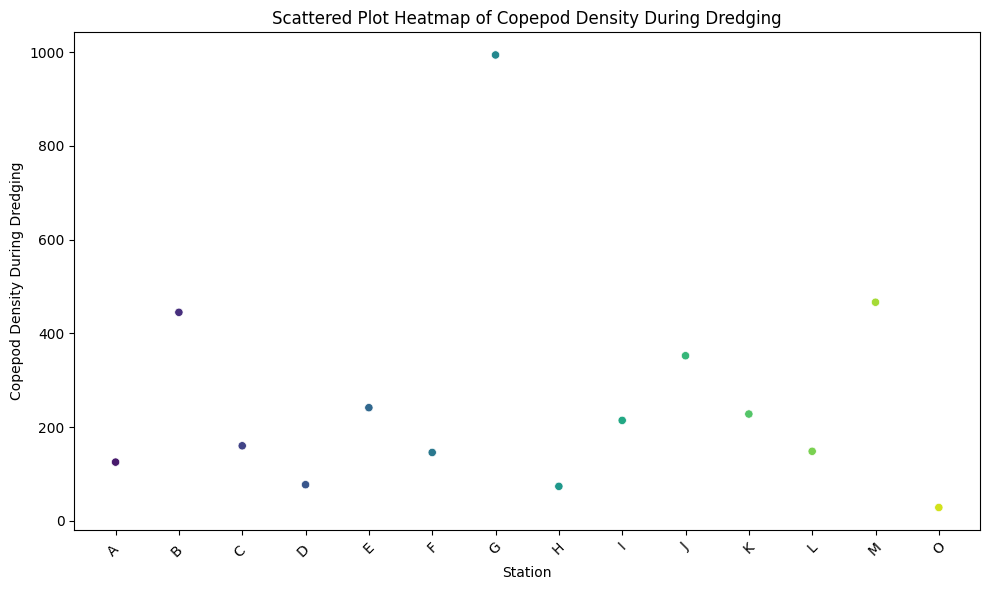

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load data from CSV file
file_path = '/content/cape_fear_station_names.csv'
data_table = pd.read_csv(file_path)

# Extracting data from the DataFrame
sta = data_table['sta']
lat = data_table['lat']
lon = data_table['lon']
cop_bef = data_table['copepod_bef']
cop_dur = data_table['copepod_during']
cop_aft = data_table['copepod_after']

# Plotting map with sampling sites on a globe
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=-78, central_latitude=34))

# Add coastline and land features
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='black')
ax.add_feature(cfeature.LAND, color='lightgray')

# Plot station locations
sc = ax.scatter(lon, lat, s=20, c='blue', marker='o', transform=ccrs.PlateCarree())

# Add station labels
for i, txt in enumerate(sta):
    ax.text(lon[i], lat[i], txt, color='blue', fontsize=8, ha='center', va='bottom', transform=ccrs.PlateCarree())

# Set map extent
ax.set_global()

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='Copepod Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sampling Sites Globe Map')

# Show the globe map
plt.show()

# Heatmap of copepod density before dredging
plt.figure(figsize=(10, 6))
sns.heatmap(cop_bef.values.reshape(-1, 1), cmap='viridis', annot=True, cbar_kws={'label': 'Copepod Density'})
plt.xlabel('Samples')
plt.ylabel('Station')
plt.title('Copepod Density Before Dredging Heatmap')
plt.show()

# Scattered plot heatmap of copepod density during dredging
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sta, y=cop_dur, hue=sta, palette='viridis', legend=False)
plt.xlabel('Station')
plt.ylabel('Copepod Density During Dredging')
plt.title('Scattered Plot Heatmap of Copepod Density During Dredging')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


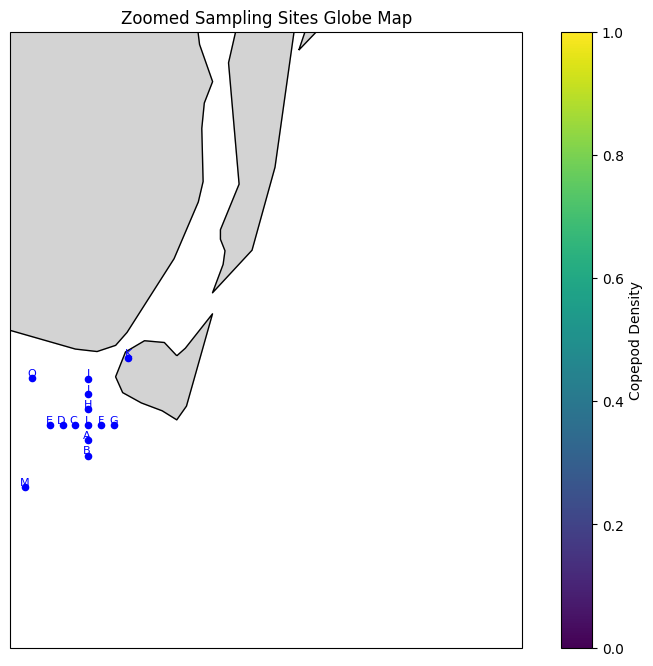

In [ ]:
# Plotting map with sampling sites on a zoomed globe
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=-77.9, central_latitude=33.9))

# Add coastline and land features
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='black')
ax.add_feature(cfeature.LAND, color='lightgray')

# Plot station locations
sc = ax.scatter(lon, lat, s=20, c='blue', marker='o', transform=ccrs.PlateCarree())

# Add station labels
for i, txt in enumerate(sta):
    ax.text(lon[i], lat[i], txt, color='blue', fontsize=8, ha='center', va='bottom', transform=ccrs.PlateCarree())

# Set map extent
ax.set_extent([-78.1, -77.7, 33.7, 34.1], crs=ccrs.PlateCarree())

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='Copepod Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Zoomed Sampling Sites Globe Map')

# Show the zoomed globe map
plt.show()

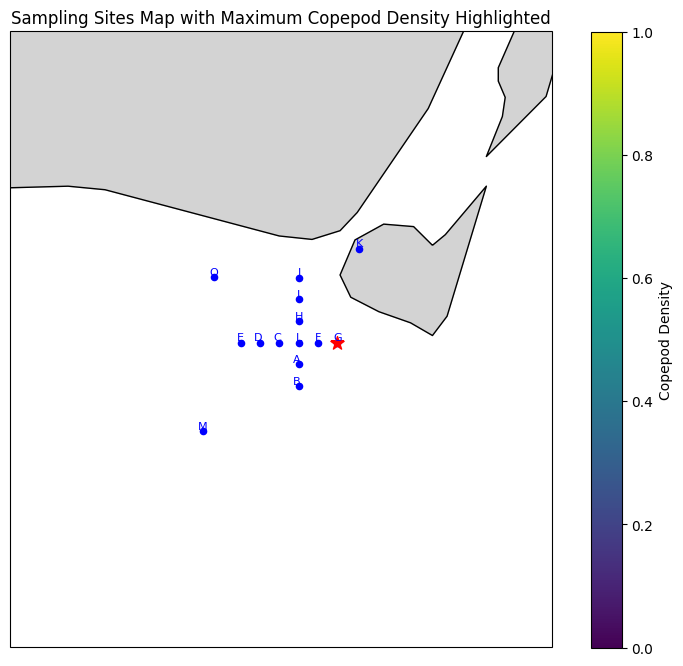

In [ ]:
# Find the index of the maximum copepod density
max_index = cop_bef.idxmax()

# Plotting map with sampling sites
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Miller())

# Add coastline and land features
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='black')
ax.add_feature(cfeature.LAND, color='lightgray')

# Plot station locations
sc = ax.scatter(lon, lat, s=20, c='blue', marker='o', transform=ccrs.PlateCarree())

# Highlight maximum density point with a different color or marker size
ax.scatter(lon[max_index], lat[max_index], s=100, c='red', marker='*', transform=ccrs.PlateCarree())

# Add station labels
for i, txt in enumerate(sta):
    ax.text(lon[i], lat[i], txt, color='blue', fontsize=8, ha='center', va='bottom', transform=ccrs.PlateCarree())

# Set map extent
ax.set_extent([min(lon) - 0.1, max(lon) + 0.1, min(lat) - 0.1, max(lat) + 0.1])

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='Copepod Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sampling Sites Map with Maximum Copepod Density Highlighted')
plt.show()

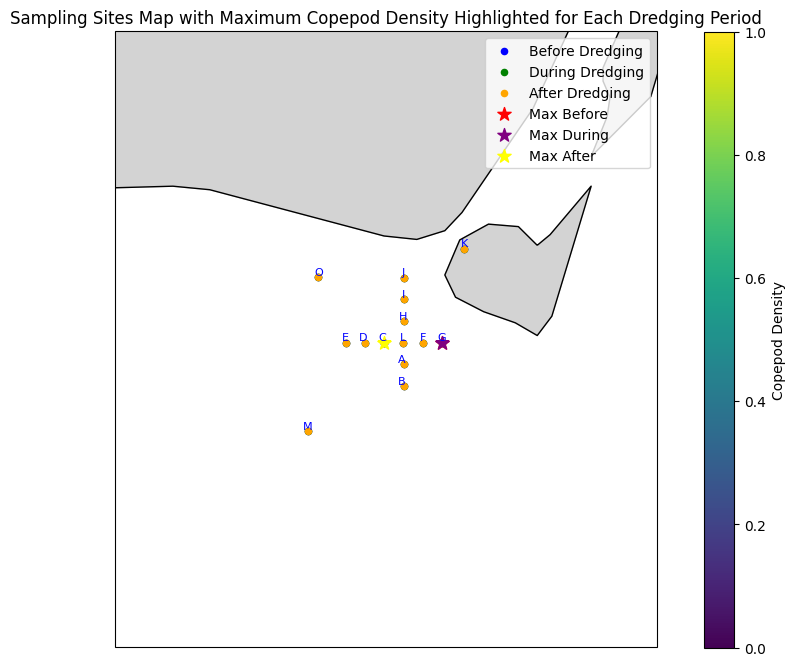

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load data from CSV file
file_path = '/content/cape_fear_station_names.csv'
data_table = pd.read_csv(file_path)

# Extracting data from the DataFrame
sta = data_table['sta']
lat = data_table['lat']
lon = data_table['lon']
cop_bef = data_table['copepod_bef']
cop_dur = data_table['copepod_during']
cop_aft = data_table['copepod_after']

# Find the indices of maximum copepod density for each period
max_index_bef = cop_bef.idxmax()
max_index_dur = cop_dur.idxmax()
max_index_aft = cop_aft.idxmax()

# Plotting map with sampling sites
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Miller())

# Add coastline and land features
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='black')
ax.add_feature(cfeature.LAND, color='lightgray')

# Plot station locations for each dredging period
sc_bef = ax.scatter(lon, lat, s=20, c='blue', marker='o', label='Before Dredging', transform=ccrs.PlateCarree())
sc_dur = ax.scatter(lon, lat, s=20, c='green', marker='o', label='During Dredging', transform=ccrs.PlateCarree())
sc_aft = ax.scatter(lon, lat, s=20, c='orange', marker='o', label='After Dredging', transform=ccrs.PlateCarree())

# Highlight maximum density points for each period with different colors
ax.scatter(lon[max_index_bef], lat[max_index_bef], s=100, c='red', marker='*', label='Max Before', transform=ccrs.PlateCarree())
ax.scatter(lon[max_index_dur], lat[max_index_dur], s=100, c='purple', marker='*', label='Max During', transform=ccrs.PlateCarree())
ax.scatter(lon[max_index_aft], lat[max_index_aft], s=100, c='yellow', marker='*', label='Max After', transform=ccrs.PlateCarree())

# Add station labels
for i, txt in enumerate(sta):
    ax.text(lon[i], lat[i], txt, color='blue', fontsize=8, ha='center', va='bottom', transform=ccrs.PlateCarree())

# Set map extent
ax.set_extent([min(lon) - 0.1, max(lon) + 0.1, min(lat) - 0.1, max(lat) + 0.1])

# Add colorbar and legend
cbar = plt.colorbar(sc_bef, ax=ax, orientation='vertical', label='Copepod Density')
ax.legend()

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sampling Sites Map with Maximum Copepod Density Highlighted for Each Dredging Period')
plt.show()
